In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

In [11]:
rng = np.random.default_rng(0)
MEAN = 0
STD = 1
NFILES = int(1e4)
NTIMES = [2**12, int(1e4), int(2e5)]
nmax = np.empty((len(NTIMES), NFILES))
for i, nt in enumerate(NTIMES):
    noise = rng.normal(loc=MEAN, scale=STD, size=(NFILES, nt))
    nmax[i] = np.max(noise, axis=-1)

In [12]:
params = [gumbel_r.fit(nm) for nm in nmax]
print(params)

[(3.477115244927679, 0.26545722657278686), (3.7101011974404, 0.24752802120192477), (4.409025636764749, 0.21620222284621873)]


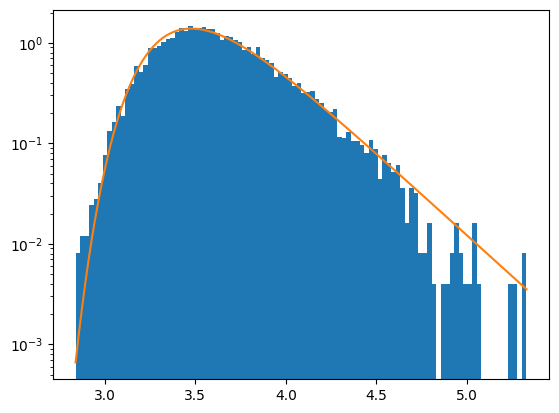

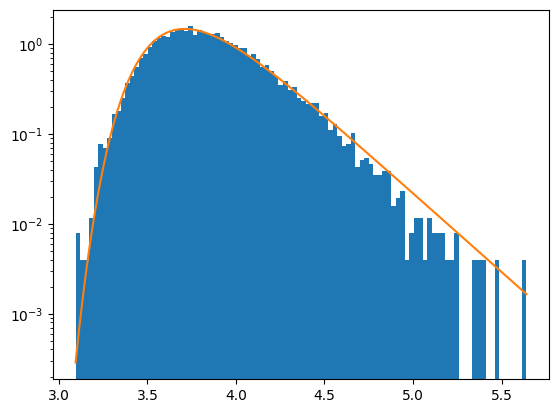

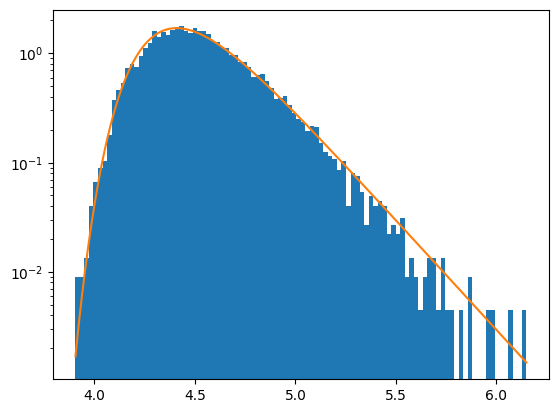

In [13]:
for i in range(len(NTIMES)):
    plt.figure()
    bins = plt.hist(nmax[i], density=True, bins=100)[1]
    x = np.linspace(bins.min(), bins.max(), num=1000)
    plt.plot(x, gumbel_r.pdf(x, *params[i]))
    plt.yscale("log")
    plt.show()